# Resolvendo o problema XOR utilizando MLP

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [26]:
#Biblioteca de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

## Etapa 02
Criar a base de dados sintética.

In [27]:
x_train = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

## Etapa 03
Conhecer a dimensão dos conjuntos da base de dados.

In [28]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)

x_train (4, 2)
y_train (4, 1)


## Etapa 04
Construir a rede neural utilizando o Keras.

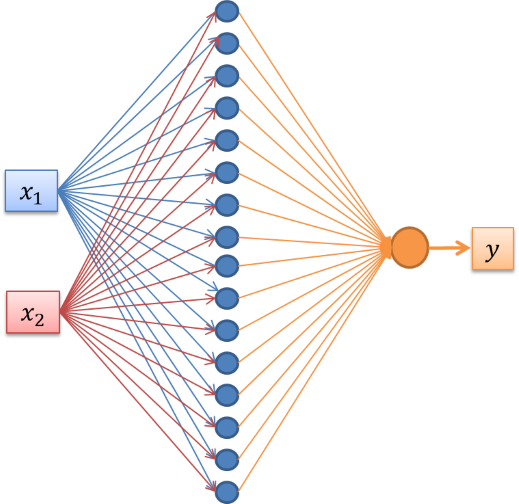

In [29]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(16, input_dim = 2, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

## Etapa 05
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [30]:
otimizador = keras.optimizers.Adam(learning_rate= 0.3)
model.compile(optimizer= otimizador,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

## Etapa 06
Treinar o modelo e realizar a validação.

Epoch 1/100
1/1 - 1s - 546ms/step - binary_accuracy: 0.7500 - loss: 0.7454
Epoch 2/100
1/1 - 0s - 20ms/step - binary_accuracy: 0.2500 - loss: 0.6993
Epoch 3/100
1/1 - 0s - 20ms/step - binary_accuracy: 0.5000 - loss: 0.6597
Epoch 4/100
1/1 - 0s - 25ms/step - binary_accuracy: 0.7500 - loss: 0.6135
Epoch 5/100
1/1 - 0s - 22ms/step - binary_accuracy: 0.7500 - loss: 0.5655
Epoch 6/100
1/1 - 0s - 20ms/step - binary_accuracy: 0.7500 - loss: 0.4707
Epoch 7/100
1/1 - 0s - 22ms/step - binary_accuracy: 0.7500 - loss: 0.4276
Epoch 8/100
1/1 - 0s - 20ms/step - binary_accuracy: 0.7500 - loss: 0.3691
Epoch 9/100
1/1 - 0s - 20ms/step - binary_accuracy: 0.7500 - loss: 0.3690
Epoch 10/100
1/1 - 0s - 23ms/step - binary_accuracy: 1.0000 - loss: 0.2673
Epoch 11/100
1/1 - 0s - 25ms/step - binary_accuracy: 1.0000 - loss: 0.1964
Epoch 12/100
1/1 - 0s - 24ms/step - binary_accuracy: 1.0000 - loss: 0.1309
Epoch 13/100
1/1 - 0s - 22ms/step - binary_accuracy: 1.0000 - loss: 0.0800
Epoch 14/100
1/1 - 0s - 22ms/step

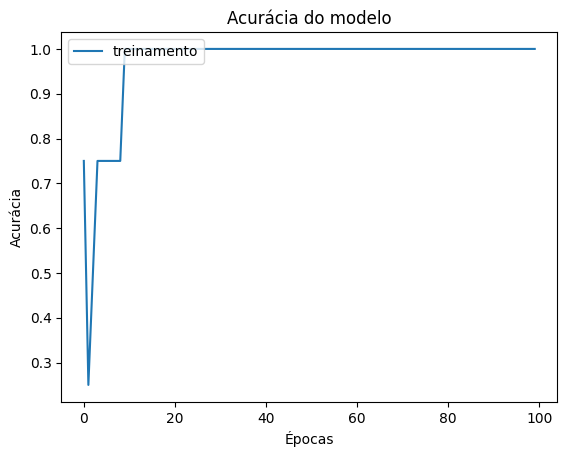

In [31]:
history = model.fit(x_train, y_train, epochs=100, batch_size=4, verbose=2)
plt.plot(history.history['binary_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treinamento'], loc='upper left')
plt.show()

## Etapa 07
Realizar algumas predições.

In [32]:
y_pred = model.predict(x_train).round()

print ('x1 x2  y')
for i in range(4):
  print(x_train[i][0], x_train[i][1], y_pred[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
x1 x2  y
0 0 [0.]
0 1 [1.]
1 0 [1.]
1 1 [0.]


In [35]:
y_pred = model.predict(x_train)
print(y_pred,'\n', y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.5939780e-05]
 [1.0000000e+00]
 [9.9999285e-01]
 [4.0107852e-06]] 
 [[0]
 [1]
 [1]
 [0]]


In [38]:
model.evaluate(x_train, y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - binary_accuracy: 1.0000 - loss: 6.7822e-06


[6.7821993070538156e-06, 1.0]